In [1]:
import pandas as pd

In [4]:
df =pd.read_csv('boston.csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [5]:
from sklearn.model_selection import train_test_split

In [7]:
# can split df into training and test data in the below code 20% is used as test data
# random_state controls the shuffling across multiple function calls so split can be reproduced 
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

In [12]:
train_df.shape

(404, 14)

In [13]:
test_df.shape

(102, 14)

In [14]:
# can split data based on targets and features
x = df.drop(['MEDV'], axis=1)
y = df['MEDV']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [15]:
x_train.shape

(404, 13)

In [16]:
y_train.shape

(404,)

In [17]:
# import the model and fit it to the traing data
from sklearn.linear_model import LinearRegression
reg_all = LinearRegression()
reg_all.fit(x_train, y_train)

LinearRegression()

In [18]:
# obtain training score with training data
r2_score = round(reg_all.score(x_train, y_train), 4)

In [19]:
# r squared score is a number between 0 and 1
print(f'r^2 training score is {r2_score}')

r^2 training score is 0.7509


In [20]:
# predict the values using the model with the test data
y_pred = reg_all.predict(x_test)

In [21]:
# can calculate the r2_score_test with the test data (more accurate)
r2_score_test = round(reg_all.score(x_test, y_test), 4)
print(r2_score_test)

0.6688


In [22]:
# mean squared error can be used to assess accuracy, this is the loss function and something that should be 
# minimised in regression models
from sklearn.metrics import mean_squared_error
import numpy as np
np.sqrt(mean_squared_error(y_test, y_pred))

4.928602182665364

In [23]:
# check how our model performed by checking errors in prediction
error = y_test - y_pred
np.sqrt(np.mean(error**2))

4.928602182665364

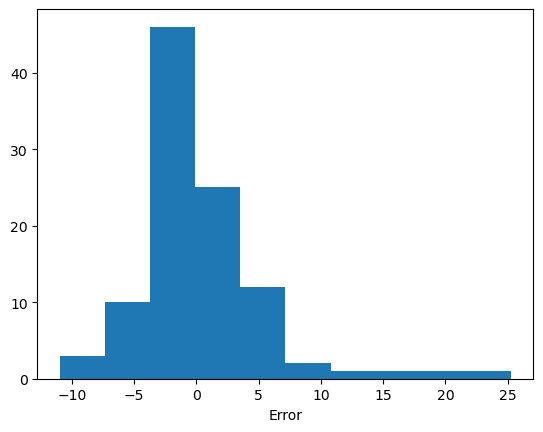

In [24]:
# check distribution of the error
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.hist(error)
ax.set_xlabel('Error')
plt.show()

In [25]:
# peak between -5 and 5 along with maximum at 0 shows that the model performed well

<Axes: >

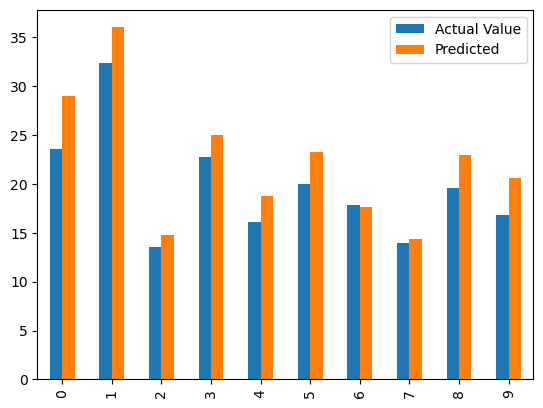

In [26]:
# want to look at the distribution of the error
data_pred_df = pd.DataFrame({'Actual Value': y_test, 'Predicted': y_pred}).reset_index(drop=True)
data_pred_df.head(10).plot(kind='bar')

<Axes: >

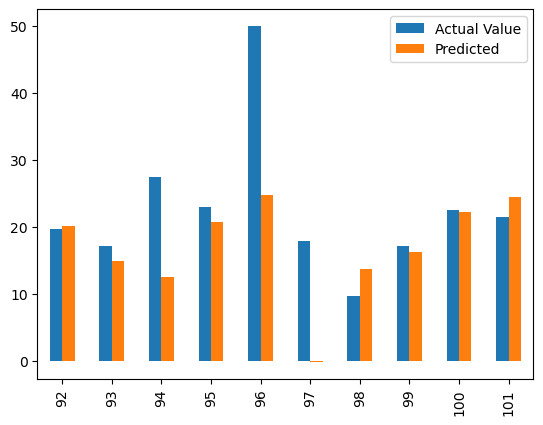

In [27]:
# this graph shows that we are always over predicting the actual value
# but differs when we look at the end of the table
data_pred_df.tail(10).plot(kind='bar')

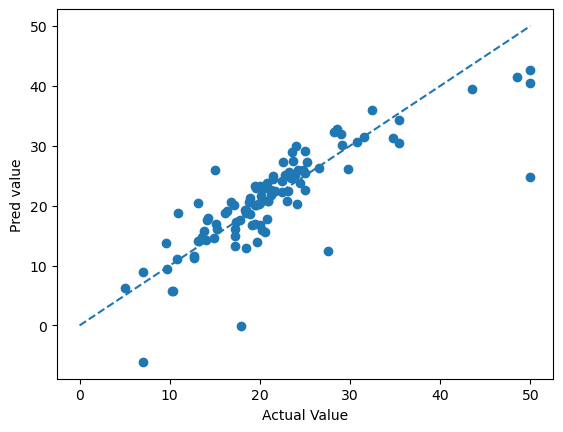

In [29]:
# can get a better idea by looking at a scatterplot
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([0,50], [0,50], linestyle='--')
ax.set_xlabel('Actual Value')
ax.set_ylabel('Pred value')
plt.show()

In [30]:
# are we happy with this training score?
# the way we split the data has an impact on the models performance
# this score might be biased by the way we split the data
# *** cross validation ***
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(reg_all, x_train, y_train, cv=10)
# cv 5 by default but we can specify here the number of folds we want to use

In [31]:
cv_scores

array([0.78005109, 0.79231329, 0.75452641, 0.29904458, 0.78702938,
       0.72324517, 0.84606865, 0.66835141, 0.79974401, 0.5362705 ])

In [32]:
# use aggregarted to number to find our score
cv_scores.mean()

0.6986644490108922

In [36]:
# cv argument for number of splits is important
# can change the value of this variable
metrics_df = pd.DataFrame()
for elem in [5, 8, 10, 15, 20]:
    cv_scores = cross_val_score(reg_all, x_train, y_train, cv=elem)
    temp_df = pd.DataFrame()
    temp_df['cv'] = [elem]
    temp_df['avg_score'] = [cv_scores.mean()]
    metrics_df = pd.concat([metrics_df, temp_df]).reset_index(drop=True)
    
metrics_df

,cv,avg_score
0,5,0.724436
1,8,0.723505
2,10,0.698664
3,15,0.705553
4,20,0.682848


# Shrinkage models, choosing alpha, extension of standard lr

In [52]:
# using training and test data from previous examples
from sklearn.linear_model import Ridge
# import pipeline as normalize parameter is deprecated
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler

In [53]:
# set normalize equal to true to avoid unfair shrinkage effect (bigger coefficients would be punished more)
ridge = make_pipeline(StandardScaler(with_mean=False), Ridge())
# this code is deprecated ridge = Ridge(standardize=True)
ridge.fit(x_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler(with_mean=False)),
                ('ridge', Ridge())])

In [55]:
y_pred = ridge.predict(x_test)
r2_train = ridge.score(x_train, y_train)
print(f'Training Performance: {r2_train}')

Training Performance: 0.7508702362003777


In [56]:
r2_test = ridge.score(x_test, y_test)
print(f'Test Performance: {r2_test}')

Test Performance: 0.6684624359643557


In [57]:
# can loop through changing params to find optimal values of alpha

# Classification in scikit learn

In [58]:
df = pd.read_csv('diabetes.csv')
x = df.drop(['diabetes'], axis=1)
y = df['diabetes']
x.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [59]:
from sklearn.model_selection import train_test_split

In [60]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [61]:
from sklearn.linear_model import LogisticRegression

In [62]:
# iter for convergence
lr = LogisticRegression(max_iter=10000)

In [63]:
# fit and predict
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

In [64]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [66]:
# negative coefficient suggests this example belongs to the negative class (sans diabeetus)
lr.coef_ @ x_test.iloc[0] + lr.intercept_

array([-0.96497879])

In [67]:
lr.coef_ @ x_test.iloc[9] + lr.intercept_

array([1.25066149])

In [68]:
# this method gives the raw probabilities
y_pred_proba = lr.predict_proba(x_test)

In [70]:
y_pred_proba[:5]

array([[0.72411753, 0.27588247],
       [0.81161379, 0.18838621],
       [0.88558064, 0.11441936],
       [0.83644524, 0.16355476],
       [0.5284347 , 0.4715653 ]])

In [74]:
# has other parameters, c for regularisation (l2 by default), penalty by default is equal to l2
# logspace from numpy function logspace
from sklearn.model_selection import GridSearchCV
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space, 'penalty': ['l1', 'l2']}
logreg = LogisticRegression()
logreg_cv = GridSearchCV(logreg, param_grid, cv=5)
logreg_cv.fit(x_train, y_train)

/Users/sean.harris/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/sean.harris/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

/Users/sean.harris/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/sean.harris/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-05, 8.48342898e-05, 7.19685673e-04, 6.10540230e-03,
       5.17947468e-02, 4.39397056e-01, 3.72759372e+00, 3.16227766e+01,
       2.68269580e+02, 2.27584593e+03, 1.93069773e+04, 1.63789371e+05,
       1.38949549e+06, 1.17876863e+07, 1.00000000e+08]),
                         'penalty': ['l1', 'l2']})

In [75]:
logreg_cv.best_params_

{'C': 31.622776601683793, 'penalty': 'l2'}

In [76]:
logreg_cv.best_score_

0.7703985072637611

In [77]:
best_model = logreg_cv.best_estimator_

In [78]:
y_pred =best_model.predict(x_test)

In [79]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0])

In [83]:
from sklearn.metrics import confusion_matrix, classification_report

In [84]:
confusion_matrix(y_test, y_pred)

array([[80, 19],
       [18, 37]])

In [85]:
# true pos, false pos
# false negative, true negative usually but not necessarily in this case
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.81      0.81        99
           1       0.66      0.67      0.67        55

    accuracy                           0.76       154
   macro avg       0.74      0.74      0.74       154
weighted avg       0.76      0.76      0.76       154



In [86]:
# can't maximise precision and recall at the same time
# other methods can be used to assess classification algorithms